In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14  
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16 
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [25]:
dj = dijet.DIJET(3, constrained_moments=True)
dj.load_params('replica_params_pp.csv')
dj.set_params(3)

roots = 95

space = {
    'y' : [0.05, 0.95],
    'z' : [0.2, 0.5],
    'min Q2' : 5,
    't' : [0.01, 0.04],
    # 'max Q2' : 30
}


data = {}
approxs = ['riemann', 'gauss', 'mc']
for approx in approxs:
    data[approx] = {}
    for weight in ['den', 'num']:
        data[approx][weight] = []

points = []
for npoints in range(3, 30):
    points.append(npoints)

    print(npoints)

    pT = 3.0
    den_riemann = dj.integrated_denominator(pT, roots**2, space, points=npoints)
    den_gauss = dj.integrated_denominator_approx(pT, roots**2, space, points=npoints)
    den_mc = dj.integrated_denominator_mc(pT, roots**2, space, points=npoints*100)
    
    data['riemann']['den'].append(den_riemann)
    data['gauss']['den'].append(den_gauss)
    data['mc']['den'].append(den_mc)

    num_riemann = dj.integrated_numerator(pT, roots**2, space, points=npoints)
    num_gauss = dj.integrated_numerator_approx(pT, roots**2, space, points=npoints)
    num_mc = dj.integrated_numerator_mc(pT, roots**2, space, points=npoints*100)
        
    data['riemann']['num'].append(num_riemann)
    data['gauss']['num'].append(num_gauss)
    data['mc']['num'].append(num_mc)

    print(data)

    np.save('predictions/integral_testing_points.npy', data, allow_pickle=True)


Using constrained moment parameters
loaded N(r^2, s) data from narr_ymin4.61_ymax14.91_AAMS09.dat
loaded polarized amp data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/d05-rc/
loaded params from replica_params_dis.csv
loaded random moment params from /dipoles/moment_params_dis.csv
loaded replica 3
loaded params from replica_params_pp.csv
loaded random moment params from /dipoles/moment_params_pp.csv
loaded replica 3
3
{'riemann': {'den': [4446.369409198386], 'num': [92.71186694487086]}, 'gauss': {'den': [4624.304549547569], 'num': [32.34917312484722]}, 'mc': {'den': [5161.457933800745], 'num': [33.522136421274475]}}
4
{'riemann': {'den': [4446.369409198386, 3209.4673495320344], 'num': [92.71186694487086, 64.25385119139047]}, 'gauss': {'den': [4624.304549547569, 5101.100288770086], 'num': [32.34917312484722, 32.55154625981889]}, 'mc': {'den': [5161.457933800745, 5182.046621147831], 'num': [33.522136421274475, 33.97165924788598]}}
5
{'riemann': {'den': [4446.3694091983

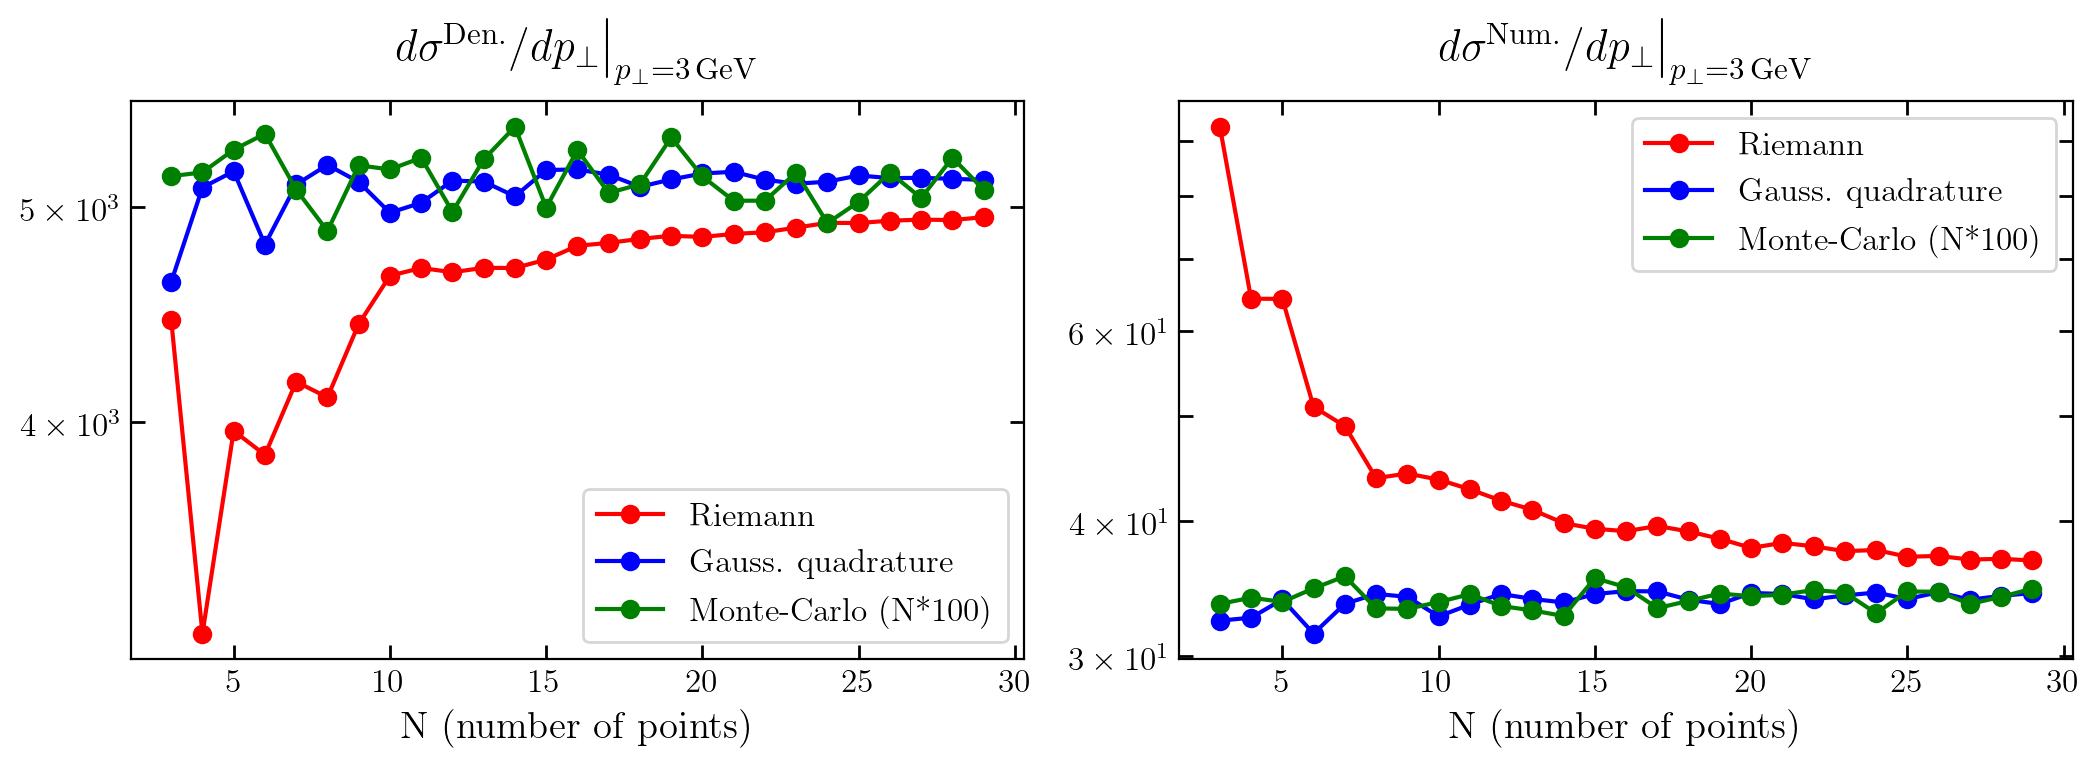

In [29]:
conv_data = np.load('predictions/integral_testing_points.npy', allow_pickle=True).item()

asp_ratio = 4/3
psize = 4

nrows, ncols = 1,2
fig, axs = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

points = np.arange(3, len(conv_data['riemann']['den']) + 3)

colors = ['r', 'b', 'g']
labels = ['Riemann', 'Gauss. quadrature', 'Monte-Carlo (N*100)']

for iax, weight in enumerate(['den', 'num']):
    for iapp, approx in enumerate(['riemann', 'gauss', 'mc']):
        axs[iax].plot(points, conv_data[approx][weight], label=labels[iapp], color=colors[iapp], marker='o')

    axs[iax].legend()
    axs[iax].semilogy()
    axs[iax].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
    axs[iax].set_xlabel('N (number of points)')
    axs[iax].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)

axs[0].set_title(r'$ d \sigma^{\mathrm{Den.}} / d p_\perp \big |_{p_\perp = 3\, \mathrm{GeV} } $', pad=15)
axs[1].set_title(r'$ d \sigma^{\mathrm{Num.}} / d p_\perp \big |_{p_\perp = 3\, \mathrm{GeV} } $', pad=15)

plt.tight_layout()
plt.show()


fig.savefig('plots/integrals_points.pdf', dpi=700)